In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
#LEOLYU Loading
from google.colab import drive
drive.mount('/content/drive')

### TODO : please modify the line below with your drive organization ###
path = os.path.join(os.getcwd(), "drive", "MyDrive")
df = pd.read_csv(path+'/AB_NYC_2019.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.host_id保留 hostname丢掉，hostid转化为计数特征

2.neighbourhood和nbgroup和roomtype做onehot处理（只在回归模型需要，树不需要）

3.minimum-night和number-of-reviews都不动或者分bucket

4.last-review转化成天数，nan的转化成最大天数加一百天（待讨论，画图看看相关性）

5.review-per-month不动

6.chlc对应1的计数特征，那不要1了

7.aval365，不动

8.经纬度丢掉

丢掉：name host-id host-name lati，longi

类别：nbgroup，nb，roomtype

数值：minimum-night，number-of-reviews，reviews-per-month，chlc，aval365

日期转数值：last-review

1.nbgroup的price直方图

2.roomtype的price直方图

3.minimum-night和price的scatterplot

4.num-of-review和price的scatterplot

5.chlc和price的scatterplot


##First we look at the result of some summary functions and drop the columns that we will not use.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Drop the columns we cannot use.

In [ ]:
df.drop(['name','host_name','host_id'], axis=1, inplace=True)

Fill the NaN in different columns.

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [ ]:
earliest = df['last_review'].min()

In [ ]:
df['last_review'] = df['last_review'].fillna(earliest)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   neighbourhood_group             48895 non-null  object        
 2   neighbourhood                   48895 non-null  object        
 3   latitude                        48895 non-null  float64       
 4   longitude                       48895 non-null  float64       
 5   room_type                       48895 non-null  object        
 6   price                           48895 non-null  int64         
 7   minimum_nights                  48895 non-null  int64         
 8   number_of_reviews               48895 non-null  int64         
 9   last_review                     48895 non-null  datetime64[ns]
 10  reviews_per_month               48895 non-null  float64       
 11  ca

In [ ]:
df.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2011-03-28,0.00,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##Then we consider the categorical data: neighborhood_group, neighbourhood, room_type. Apply visualization and onehot encode.

In [ ]:
cat_label = ['neighbourhood_group','neighbourhood','room_type']

Neighbourhood_group 

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

See how price distributed among the five categories.

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

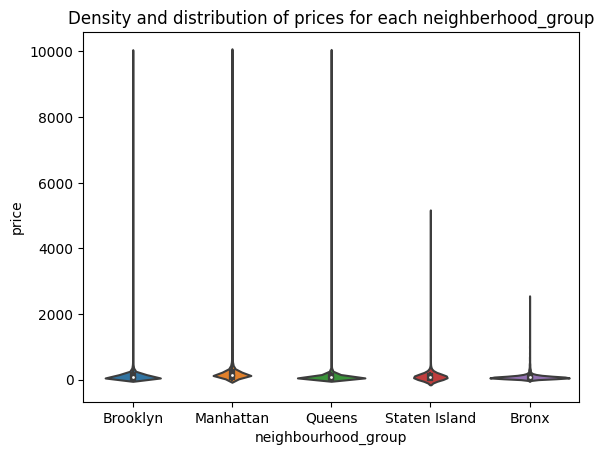

In [ ]:
viz_1=sns.violinplot(data=df, x='neighbourhood_group', y='price')
viz_1.set_title('Density and distribution of prices for each neighberhood_group')

We need to get rid of those extreme values.

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

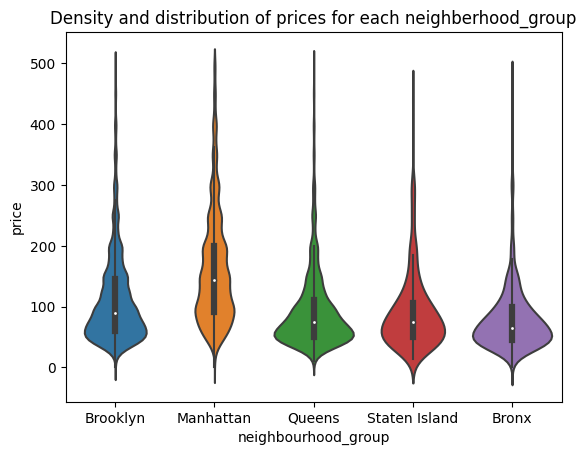

In [ ]:
df1=df[df.price < 500]
viz_1=sns.violinplot(data=df1, x='neighbourhood_group', y='price')
viz_1.set_title('Density and distribution of prices for each neighberhood_group')

Then neighbourhood.

In [ ]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

Find out neighbourhoods that have over 1000 of Airbnb. 

In [ ]:
df['neighbourhood'].value_counts()[df['neighbourhood'].value_counts()>1000].index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown', 'East Harlem', 'Greenpoint', 'Chelsea'],
      dtype='object')

In [ ]:
df2 = df.query("neighbourhood in ['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick','Upper West Side',  'East Village', 'Upper East Side','Crown Heights', 'Midtown', 'East Harlem', 'Greenpoint', 'Chelsea']")

See how the price distributed.

Text(0.5, 1.0, 'Density and distribution of prices for each room type')

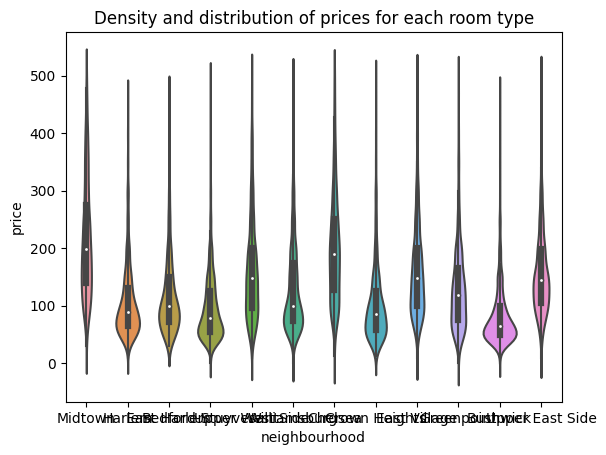

In [ ]:
df2=df2[df2.price < 500]
viz_1=sns.violinplot(data=df2, x='neighbourhood', y='price')
viz_1.set_title('Density and distribution of prices for each room type')

Similar analysis on room_type

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Density and distribution of prices for each room type')

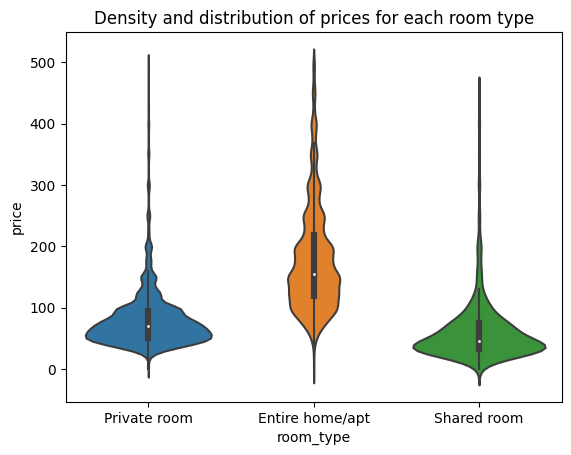

In [ ]:
df1=df[df.price < 500]
viz_1=sns.violinplot(data=df1, x='room_type', y='price')
viz_1.set_title('Density and distribution of prices for each room type')

Feature engineering on these catagorical data.

In [ ]:
df_cat = df[df.price < 2000][cat_label]

In [ ]:
df_cat

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt
48893,Manhattan,Hell's Kitchen,Shared room


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_cat)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.transform([['Bronx', 'Woodside','Shared room']]).toarray()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
df_cats = enc.transform(df_cat).toarray()

In [ ]:
df_cats.shape

(48785, 229)

##Next, we consider the date data, which is the 'last_review' column.

In [ ]:
today = pd.to_datetime(df['last_review']).max()

In [ ]:
df['last_review'] = df['last_review'].apply(lambda x: (today - x).days)

In [ ]:
df['last_review']

0         262
1          48
2        3024
3           3
4         231
         ... 
48890    3024
48891    3024
48892    3024
48893    3024
48894    3024
Name: last_review, Length: 48895, dtype: int64

##Then we consider the digital data.

In [ ]:
dig_label = ['minimum_nights','calculated_host_listings_count','availability_365','price','reviews_per_month', 'latitude',	'longitude','number_of_reviews', 'last_review']

In [ ]:
df_dig = df[dig_label]
df_dig = df_dig[df_dig.price < 2000]

In [ ]:
df_dig

,minimum_nights,calculated_host_listings_count,availability_365,price,reviews_per_month,latitude,longitude,number_of_reviews,last_review
0,1,6,365,149,0.21,40.64749,-73.97237,9,262
1,1,2,355,225,0.38,40.75362,-73.98377,45,48
2,3,1,365,150,0.00,40.80902,-73.94190,0,3024
3,1,1,194,89,4.64,40.68514,-73.95976,270,3
4,10,1,0,80,0.10,40.79851,-73.94399,9,231
...,...,...,...,...,...,...,...,...,...
48890,2,2,9,70,0.00,40.67853,-73.94995,0,3024
48891,4,2,36,40,0.00,40.70184,-73.93317,0,3024
48892,10,1,27,115,0.00,40.81475,-73.94867,0,3024
48893,1,6,2,55,0.00,40.75751,-73.99112,0,3024


See the distribution of our digital features and target (price) by a histgram, we can see on the left, the original data has a long tail distribution. Some of the features remain highly skewed even after we conduct a log-transformation.

'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','last_review','price'


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


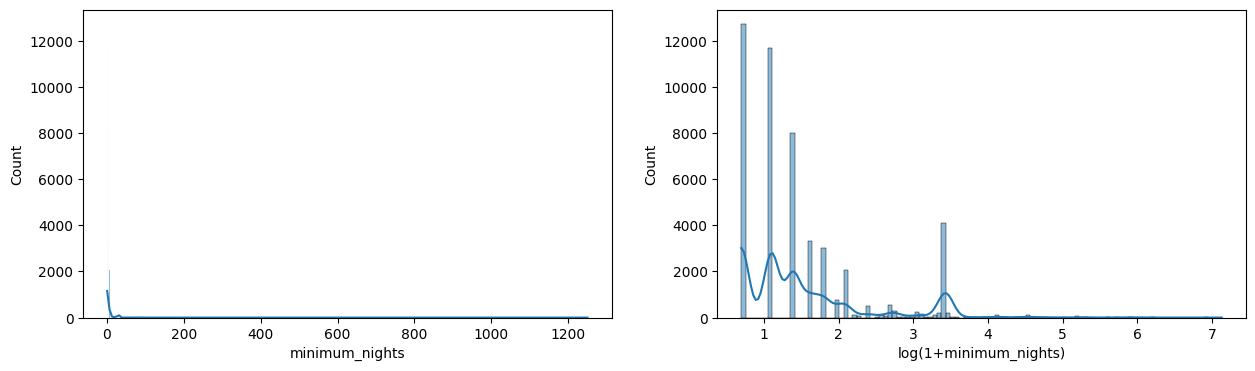

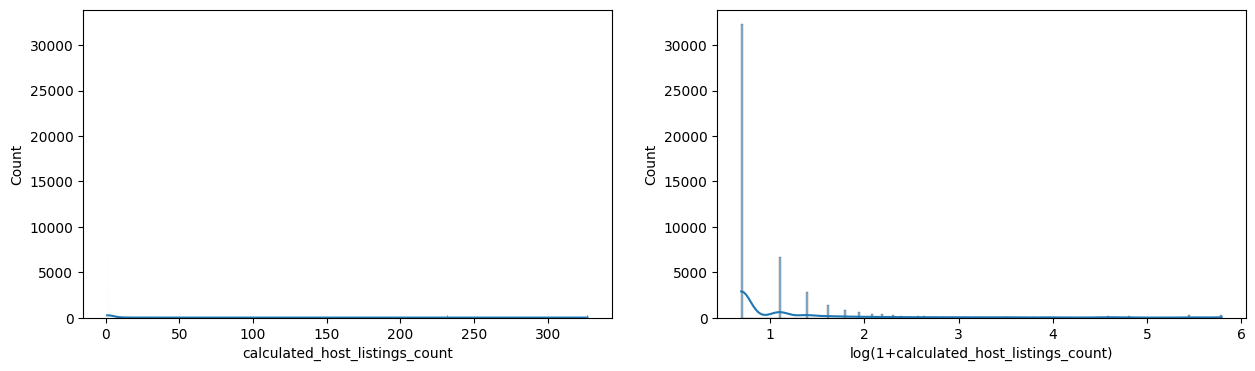

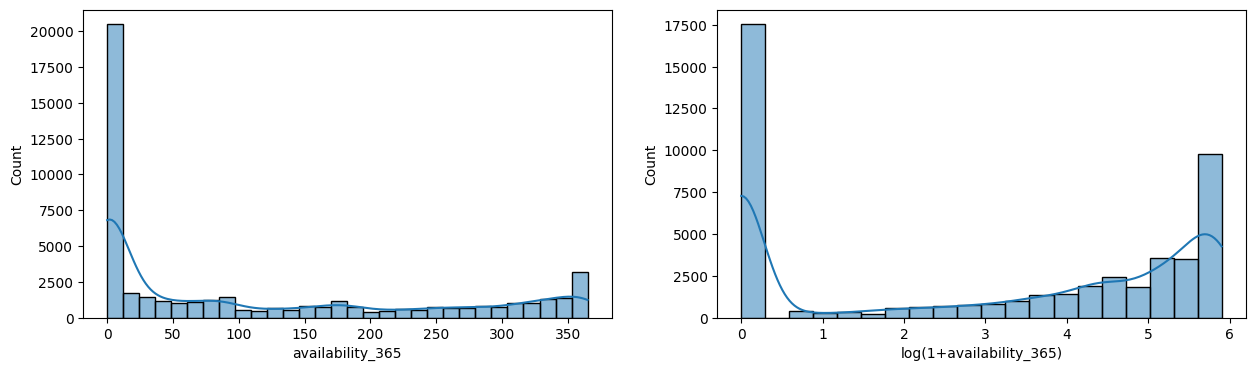

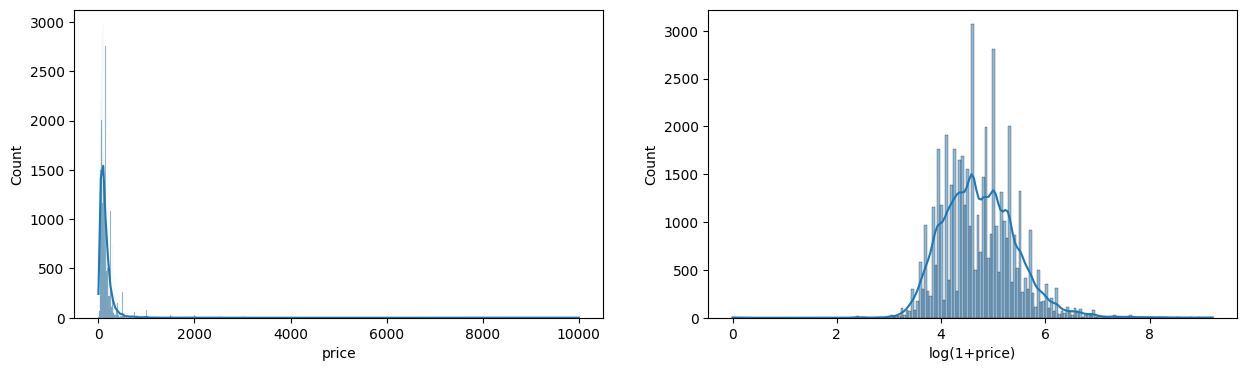

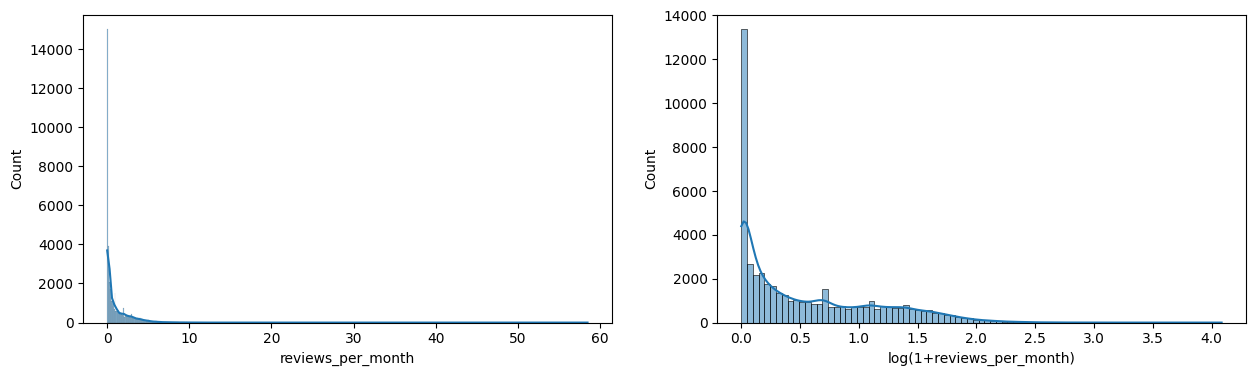

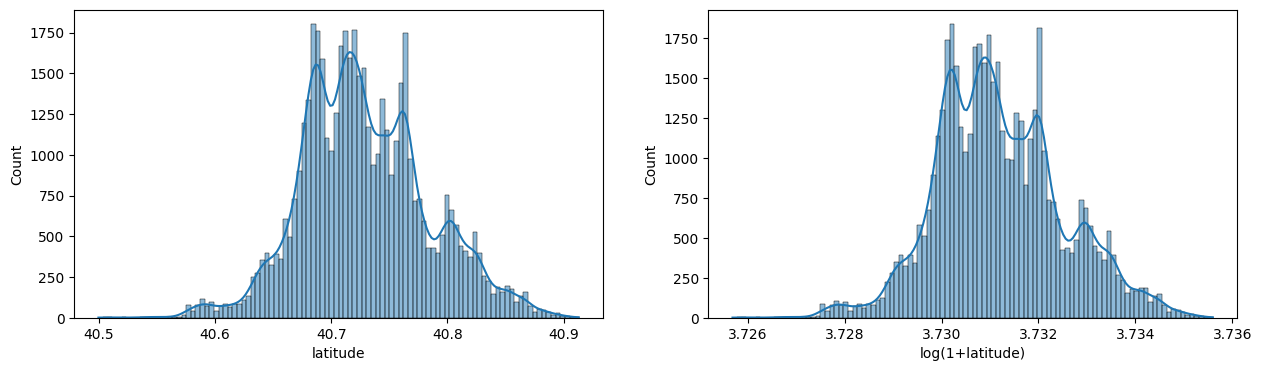

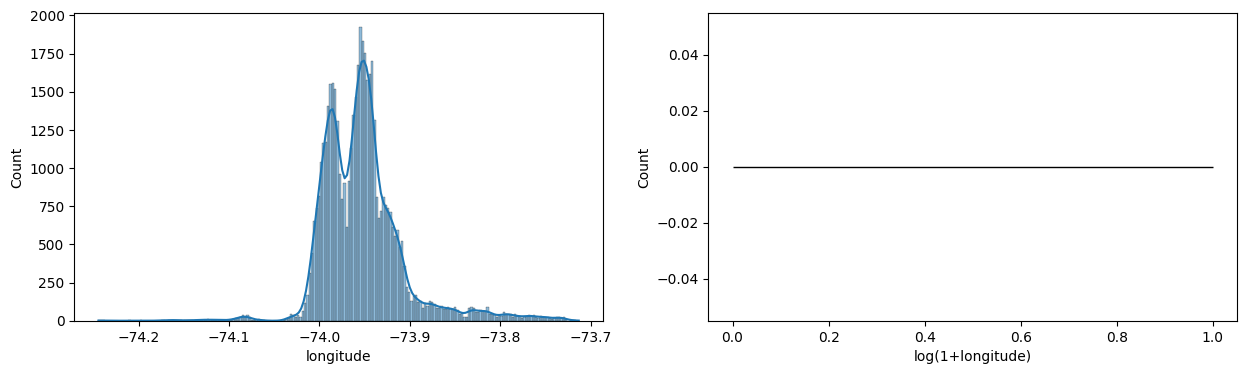

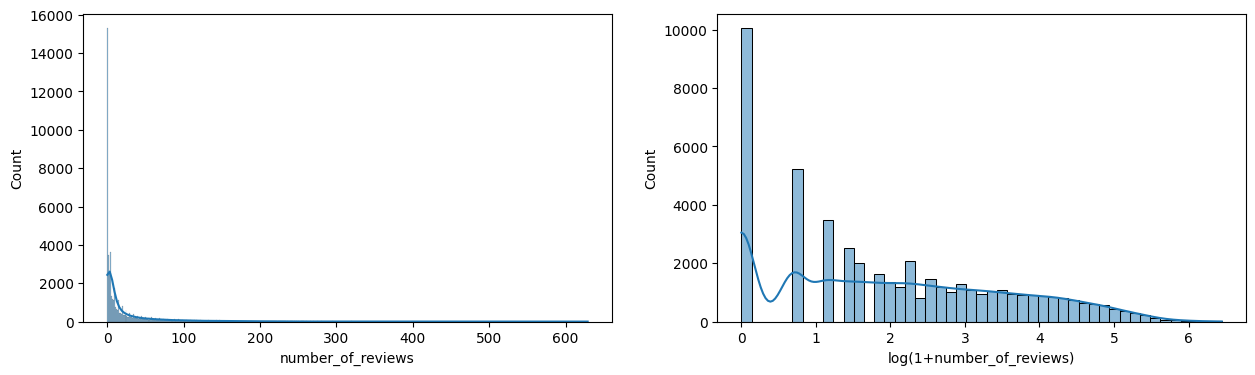

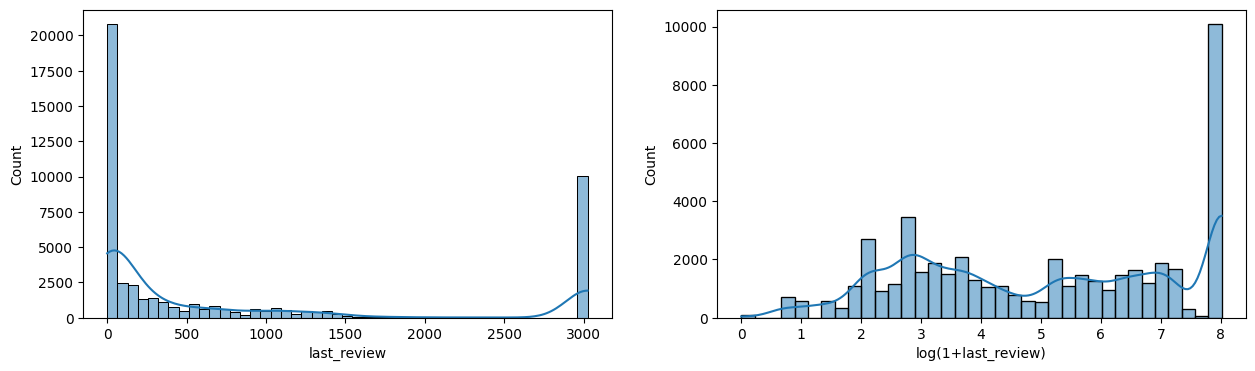

In [ ]:
for name in dig_label: 
  fig, axes = plt.subplots(1,2, figsize=(15,4))
  sns.histplot(df[name], ax=axes[0],kde = True)
  sns.histplot(np.log1p(df[name]), ax=axes[1],kde = True)
  axes[1].set_xlabel('log(1+' + name +')')

We change the features who receive a great improvement on distribution after a log-transformation.

In [ ]:
df_dig['price'] = np.log1p(df_dig['price'])
df_dig['minimum_nights'] = np.log1p(df_dig['minimum_nights'])
df_dig['last_review'] = np.log1p(df_dig['last_review'])

Combine categorical data and digital data to build up a model.

In [ ]:
df_cats

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
df_dig

,minimum_nights,calculated_host_listings_count,availability_365,price,reviews_per_month,latitude,longitude,number_of_reviews,last_review
0,0.693147,6,365,5.010635,0.21,40.64749,-73.97237,9,5.572154
1,0.693147,2,355,5.420535,0.38,40.75362,-73.98377,45,3.891820
2,1.386294,1,365,5.017280,0.00,40.80902,-73.94190,0,8.014666
3,0.693147,1,194,4.499810,4.64,40.68514,-73.95976,270,1.386294
4,2.397895,1,0,4.394449,0.10,40.79851,-73.94399,9,5.446737
...,...,...,...,...,...,...,...,...,...
48890,1.098612,2,9,4.262680,0.00,40.67853,-73.94995,0,8.014666
48891,1.609438,2,36,3.713572,0.00,40.70184,-73.93317,0,8.014666
48892,2.397895,1,27,4.753590,0.00,40.81475,-73.94867,0,8.014666
48893,0.693147,6,2,4.025352,0.00,40.75751,-73.99112,0,8.014666


In [ ]:
y = df_dig['price']
df_digs = np.asarray(df_dig.drop(['price'],axis = 1))

In [ ]:
X = np.concatenate((df_cats,df_digs),axis = 1)

In [ ]:
X.shape

(48785, 237)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=6, n_estimators=300)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(mean_squared_error(rf_pred, y_test))

0.20062027465487833


In [ ]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=100)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print(mean_squared_error(xgb_pred, y_test))

0.18213461664553357


In [ ]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(max_depth=8, learning_rate=0.1, n_estimators=200)
lgb.fit(X_train,y_train)
lgb_pred = lgb.predict(X_test)
print(mean_squared_error(lgb_pred, y_test))

0.17574136167140944


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

other_params = {'boosting_type' : 'gbdt',

                'objective': 'regression', 

                'n_estimators': 275,
                'max_depth': 6,
                'min_child_samples': 20,
                'reg_lambd': 0.1,
                'reg_alpha': 0.1,
                'metric': 'mse',
                'colsample_bytree': 1,
                'subsample': 0.8,
                'num_leaves' : 40,
                'random_state': 2018}
   

rds_params = {'n_estimators': range(100, 300, 50),
                      'min_child_weight': range(3, 15, 3),
                      'colsample_bytree': np.arange(0.4, 1.0),
                      'max_depth': range(5, 15, 3),
                      'subsample': np.arange(0.5, 1.0, 0.1),
                      'reg_lambda': np.arange(0.1, 1.0, 0.3),
                      'reg_alpha': np.arange(0.1, 1.0, 0.3),
                      'min_child_samples': range(10, 30,3)}
  

model = lgb.LGBMRegressor(**other_params)

optimized_GBM = RandomizedSearchCV(model , rds_params, n_iter=50, cv=5, n_jobs=4)
optimized_GBM.fit(X_train, y_train) 

print('Best params：{0}'.format(optimized_GBM.best_params_))

print('Best score:{0}'.format(optimized_GBM.best_score_))


[LightGBM] [Warning] Unknown parameter: reg_lambd
Best params：{'subsample': 0.7999999999999999, 'reg_lambda': 0.4, 'reg_alpha': 0.4, 'n_estimators': 250, 'min_child_weight': 6, 'min_child_samples': 16, 'max_depth': 14, 'colsample_bytree': 0.4}
Best score:0.6290216770990429


In [ ]:
opt_pred = optimized_GBM.predict(X_test)

In [ ]:
print(mean_squared_error(opt_pred, y_test))

0.17451240452916908
